#LogisticRegression

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') #warnings.filterwarnings('ignore') 명령은 경고 메시지를 숨기는 데 사용
body = pd.read_csv('/content/drive/MyDrive/datasets/body.csv')


In [ ]:
body['gender'] = np.where(body['gender'] == 'M', 0, 1)
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
body

,Unnamed: 0,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [ ]:
body.info(), body.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               13393 non-null  int64  
 1   age                      13393 non-null  float64
 2   gender                   13393 non-null  int64  
 3   height_cm                13393 non-null  float64
 4   weight_kg                13393 non-null  float64
 5   body fat_%               13393 non-null  float64
 6   diastolic                13393 non-null  float64
 7   systolic                 13393 non-null  float64
 8   gripForce                13393 non-null  float64
 9   sit and bend forward_cm  13393 non-null  float64
 10  sit-ups counts           13393 non-null  float64
 11  broad jump_cm            13393 non-null  float64
 12  class                    13393 non-null  object 
 13  class_1                  13393 non-null  int64  
dtypes: float64(10), int64(

(None,
          Unnamed: 0           age        gender     height_cm     weight_kg  \
 count  13393.000000  13393.000000  13393.000000  13393.000000  13393.000000   
 mean    6696.000000     36.775106      0.367804    168.559807     67.447316   
 std     3866.370413     13.625639      0.482226      8.426583     11.949666   
 min        0.000000     21.000000      0.000000    125.000000     26.300000   
 25%     3348.000000     25.000000      0.000000    162.400000     58.200000   
 50%     6696.000000     32.000000      0.000000    169.200000     67.400000   
 75%    10044.000000     48.000000      1.000000    174.800000     75.300000   
 max    13392.000000     64.000000      1.000000    193.800000    138.100000   
 
          body fat_%     diastolic      systolic     gripForce  \
 count  13393.000000  13393.000000  13393.000000  13393.000000   
 mean      23.240165     78.796842    130.234817     36.963877   
 std        7.256844     10.742033     14.713954     10.624864   
 min   

In [ ]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1'])) #body.drop(['class', 'class_1], axis = 1)
x = body[feature_columns]
y = body['class_1']

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, stratify = y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(9375, 12) (4018, 12) (9375,) (4018,)


In [ ]:
from sklearn.linear_model import LogisticRegression
logR = LogisticRegression(random_state = 45)
logR.fit(x_train, y_train)

LogisticRegression(random_state=45)

In [ ]:
proba= pd.DataFrame(logR.predict_proba(x_train))
cs = logR.decision_function(x_train)
print(proba)
df = pd.concat([proba, pd.DataFrame(cs)], axis = 1)
df.columns = ['Not A', 'A', 'decision_function']

df.sort_values(['decision_function'], inplace = True)
df.reset_index(inplace = True, drop = True)
df


             0         1
0     0.697430  0.302570
1     0.999381  0.000619
2     0.984991  0.015009
3     0.936635  0.063365
4     0.822364  0.177636
...        ...       ...
9370  0.999510  0.000490
9371  0.940376  0.059624
9372  0.513075  0.486925
9373  0.765162  0.234838
9374  0.989479  0.010521

[9375 rows x 2 columns]


,Not A,A,decision_function
0,1.000000,9.458597e-08,-16.173757
1,1.000000,9.606985e-08,-16.158190
2,1.000000,1.604219e-07,-15.645459
3,1.000000,1.658641e-07,-15.612097
4,1.000000,1.946585e-07,-15.452019
...,...,...,...
9370,0.004810,9.951899e-01,5.332225
9371,0.004644,9.953558e-01,5.367471
9372,0.004217,9.957833e-01,5.464482
9373,0.004074,9.959265e-01,5.499162


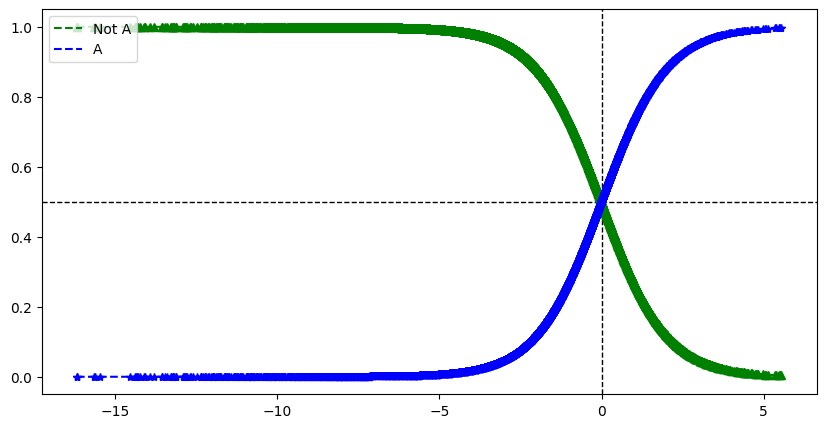

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.axhline(y = 0.5, linestyle = '--',color = 'black', linewidth = 1)
plt.axvline(x = 0, linestyle = '--', color = 'black', linewidth = 1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label = 'Not A')
plt.plot(df['decision_function'], df['Not A'], 'g^')
plt.plot(df['decision_function'], df['A'], 'b--', label = 'A')
plt.plot(df['decision_function'], df['A'], 'b*')

plt.xlabel
plt.ylabel

plt.legend(loc = 'upper left')
plt.show()

#혼돈행렬 값 출력 위치
#(TN)    (FP)
#[[2755, 259]
##(FN)  (TP)
#[ 384,  620]]
True Negative (TN) False Positive (FP)

False Negative (FN) True Positive (TP)
 	​
  




​



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(x_test)

test_cm = confusion_matrix(y_test, pred)
test_acc = accuracy_score(y_test, pred)
test_precision = precision_score(y_test, pred)
test_recall = recall_score(y_test, pred)
test_f1 = f1_score(y_test, pred)

print(test_cm)
print()
print('정확도 \t{}%'.format(round(test_acc*100, 2)))
print('정밀도 \t{}%'.format(round(test_precision *100, 2)))
print('재현율 \t{}%'.format(round(test_recall*100, 2)))
print('F1 \t{}%'.format(round(test_f1*100, 2)))

[[2755  259]
 [ 384  620]]

정확도 	84.0%
정밀도 	70.53%
재현율 	61.75%
F1 	65.85%


##AUC 값 0.90: AUC (Area Under the Curve) 값은 ROC 곡선 아래 영역의 크기를 의미하며, 일반적으로 1에 가까울수록 좋음. AUC 값이 0.90이라는 것은 모델이 무작위 추측보다 훨씬 좋은 성능을 보이고 있음을 의미

<Figure size 1000x500 with 0 Axes>

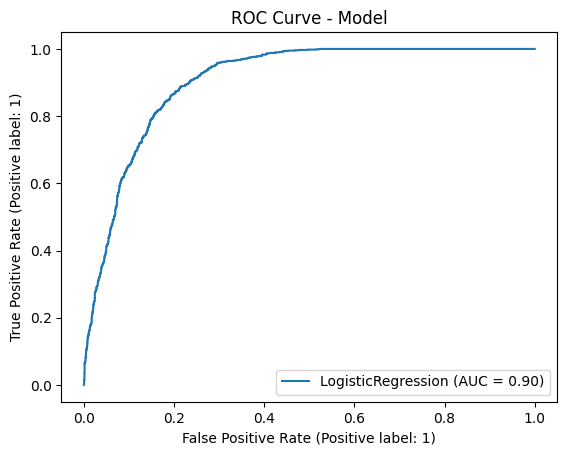

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize = (10, 5))
RocCurveDisplay.from_estimator(logR, x_test, y_test) # 예측모델인 logR로 넣어야됨
plt.title('ROC Curve - Model')
plt.show()


###*RocCurveDisplay.from_estimator: 이 메소드는 예측 확률(probabilities) 또는 결정 점수(scores)를 사용하여 ROC 곡선을 계산함. logR 모델의 predict_proba 또는 decision_function 메소드를 통해 얻은 확률 또는 점수를 사용하여 ROC 곡선을 그림. 이 방식은 모델이 예측한 각 클래스의 확률을 고려하며, 이를 통해 다양한 임계값에서의 성능을 평가함

###*roc_curve(y_test, pred): 반면, 여기서 사용된 roc_curve 함수는 pred라는 변수에 저장된 예측 라벨(labels)을 사용함. 이는 모델이 예측한 최종 클래스 라벨이며, 특정 임계값(기본적으로 0.5)을 기준으로 결정됨. 이 방식은 단일 임계값에서의 성능만을 고려함

##따라서 ROC 곡선과 AUC를 계산할 때는 모델의 예측 확률을 사용하는 것이 가장 적합하며. 이 방법은 모델이 양성 클래스에 속한다고 예측한 확률을 기반으로 하여, 다양한 임계값에서 모델의 성능을 평가할 수 있게 해줌

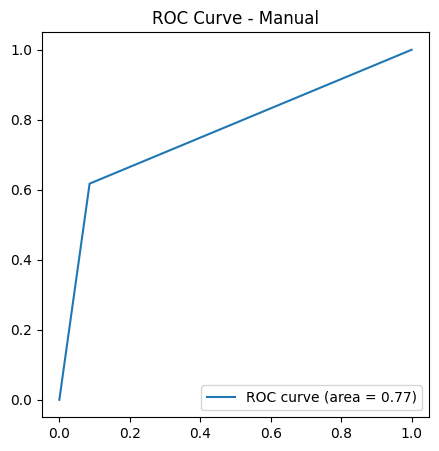

In [ ]:
from sklearn.metrics import  roc_curve, auc
plt.figure(figsize = (5, 5))
fp, tp, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fp, tp)  # AUC 값 계산
plt.plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
plt.title('ROC Curve - Manual')
# AUC 값 표시
plt.legend(loc='lower right')
plt.show()

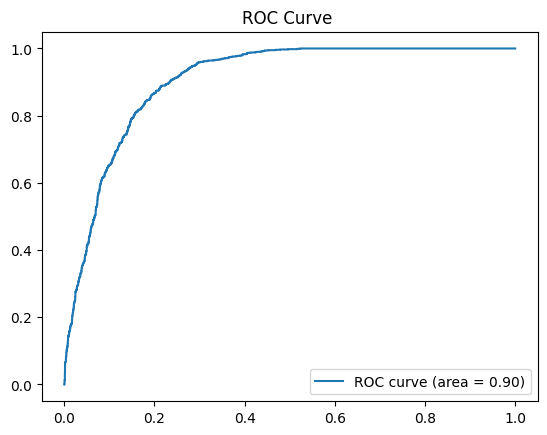

In [ ]:
fp, tp, thresholds = roc_curve(y_test, pred_proba) # roc_curve(y_test, pred_proba)  위치 주의
roc_auc = auc(fp, tp)
plt.plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
plt.title('ROC Curve ')
plt.legend(loc='lower right')
plt.show()

#SVC

###SVC: 일반적인 SVM 모델로, 비선형 데이터에 대한 분류와 회귀를 수행할 때 커널 트릭을 사용하여 데이터를 고차원 공간으로 매핑. 이를 통해 비선형 문제를 해결할 수 있음.
###LinearSVC: 선형 SVM 모델로, 데이터를 고차원으로 변환하지 않고 선형 결정 경계만 사용함. 따라서 커널 트릭을 사용하지 않으며, 선형 문제에 적합함.
###속도와 메모리 사용:SVC는 커널 트릭을 사용하므로 고차원으로 변환된 데이터를 다룸. 이로 인해 메모리 사용량이 더 많을 수 있고, 특히 큰 데이터셋에 대해서는 느릴 수 있음.
###LinearSVC는 선형 결정 경계만 고려하기 때문에 커널 트릭을 사용하지 않으므로 일반적으로 더 빠르며 메모리 사용량이 적음. 그러나 선형 데이터에만 적합.

#SVM_LinerSVC

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

classification = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/classification.csv')
classification.to_csv('/content/drive/MyDrive/datasets/classification.csv')

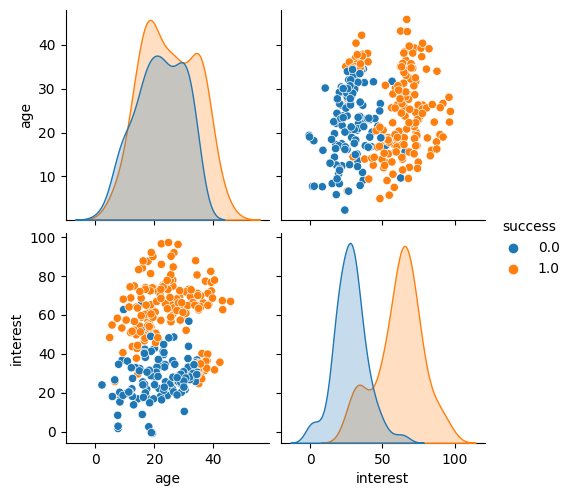

In [ ]:
sns.pairplot(hue = 'success', data = c)

In [ ]:
from sklearn.model_selection import train_test_split

x = c[['age', 'interest']]  #[[]]데이터 프레임으로 저장함
y = c['success']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, stratify = y)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(207, 2) (90, 2) (207,) (90,)


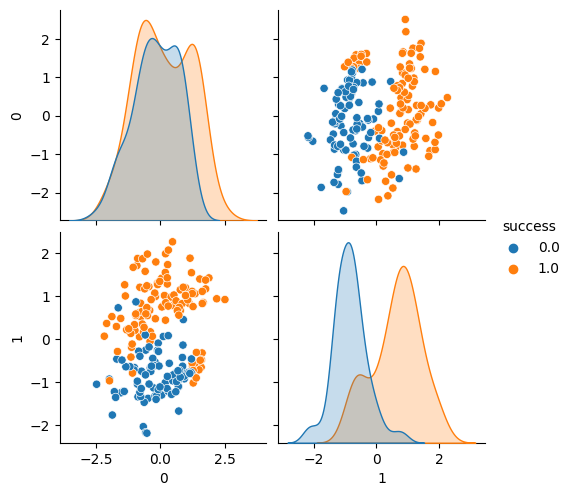

In [ ]:
from sklearn.preprocessing import StandardScaler  # 스케일 변환후 특성 변화가 있음

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

sns.pairplot(data = pd.concat([pd.DataFrame(x_train), y_train.reset_index(drop = True)], axis = 1), hue = 'success')